[INFO] Axis limits:
Y1: (-4.493735658719995, 17.797104384989957)
Y2: (-3.970213029003065, 18.368435883166672)
Y3: (-3.5837617216706303, 9.794783139102165)


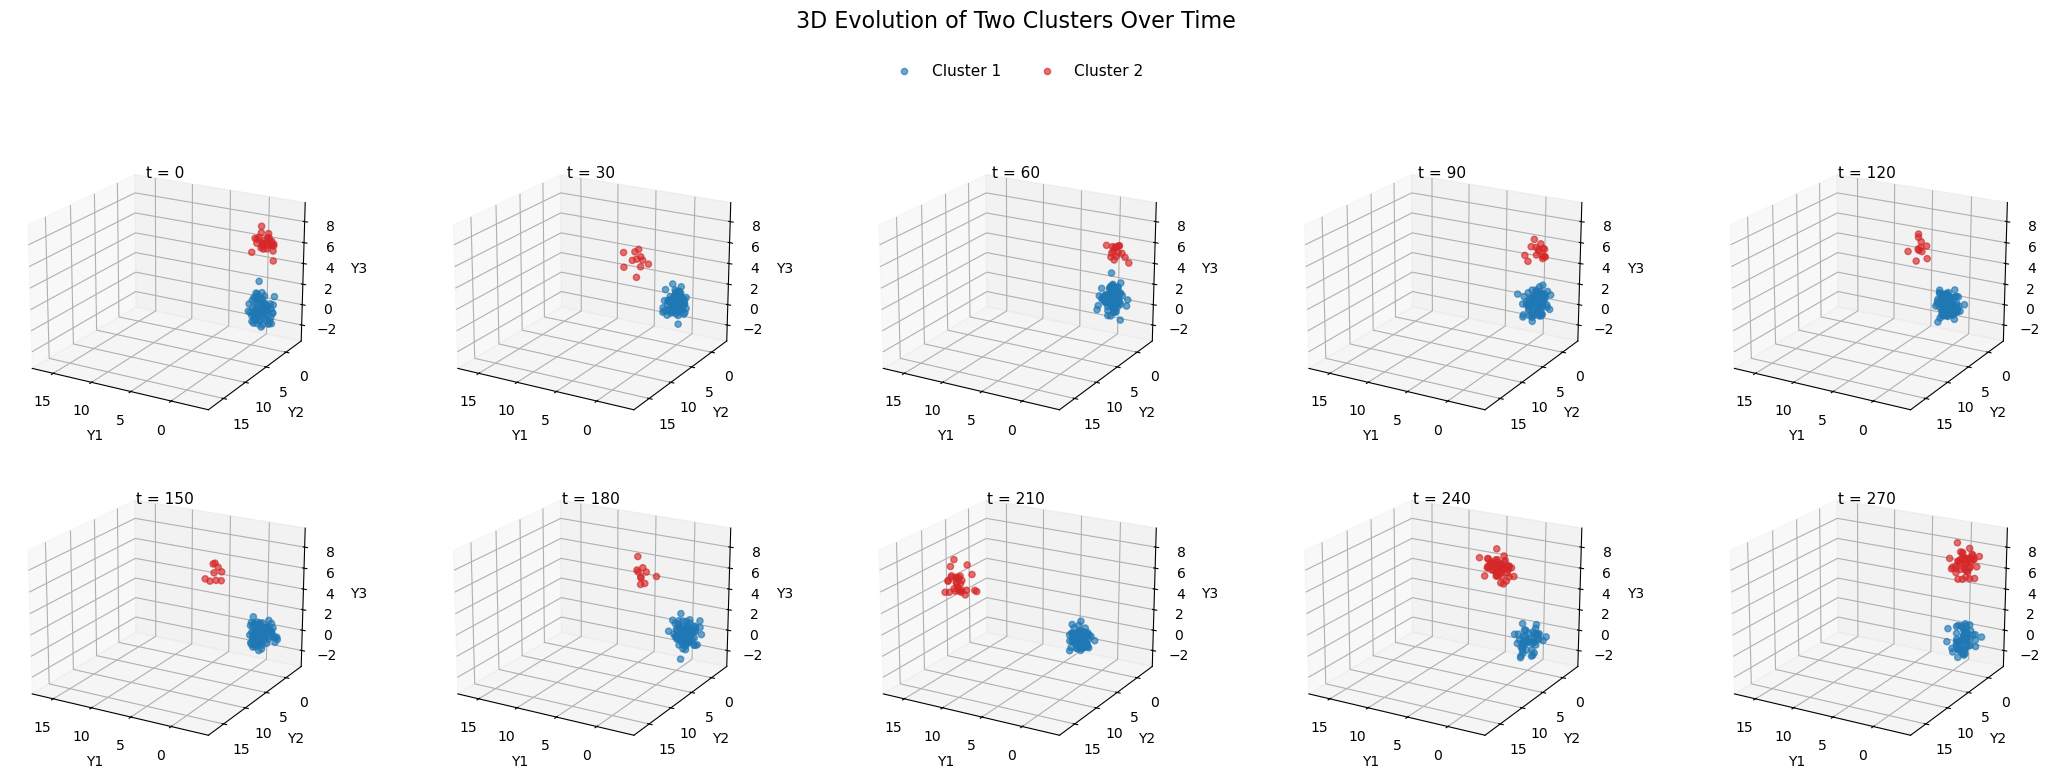

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# ======================================================
# Assumed input:
# Y_df shape = (T, N, 4)
#   Y_df[..., 0:3] -> Y1, Y2, Y3
#   Y_df[..., 3]   -> cluster label (0 / 1)
# ======================================================

# ===============================
# Config
# ===============================
STEP = 30          # snapshot every 30 time points
MAX_COL = 5        # max subplots per row

T, N, _ = Y_df.shape
time_points = list(range(0, T, STEP))

ncols = min(MAX_COL, len(time_points))
nrows = int(np.ceil(len(time_points) / ncols))

# ===============================
# Cluster info
# ===============================
cluster_labels = np.unique(Y_df[:, :, 3].astype(int))
assert len(cluster_labels) == 2, "This visualization assumes exactly 2 clusters."

colors = ["#1f77b4", "#d62728"]  # blue / red

# ===============================
# Axis limits: data range ± 0.5
# ===============================
pad = 0.5

x_min, x_max = Y_df[:, :, 0].min(), Y_df[:, :, 0].max()
y_min, y_max = Y_df[:, :, 1].min(), Y_df[:, :, 1].max()
z_min, z_max = Y_df[:, :, 2].min(), Y_df[:, :, 2].max()

xlim = (x_min - pad, x_max + pad)
ylim = (y_min - pad, y_max + pad)
zlim = (z_min - pad, z_max + pad)

print("[INFO] Axis limits:")
print("Y1:", xlim)
print("Y2:", ylim)
print("Y3:", zlim)

# ===============================
# Create figure
# ===============================
fig = plt.figure(figsize=(4.3 * ncols, 4.0 * nrows))

for idx, t in enumerate(time_points):
    ax = fig.add_subplot(nrows, ncols, idx + 1, projection="3d")

    # ---- scatter by cluster ----
    for j, lab in enumerate(cluster_labels):
        mask = (Y_df[t, :, 3] == lab)
        ax.scatter(
            Y_df[t, mask, 0],
            Y_df[t, mask, 1],
            Y_df[t, mask, 2],
            color=colors[j],
            alpha=0.65,
            s=20,
            label=f"Cluster {lab}" if idx == 0 else None
        )

    # ---- axis limits ----
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_zlim(zlim)

    # ---- DO NOT use ax.set_title() in 3D ----
    # Stable subtitle placement using text2D
    ax.text2D(
        0.5, 0.90,              # axes coordinates
        f"t = {t}",
        transform=ax.transAxes,
        ha="center",
        va="top",
        fontsize=11
    )

    # ---- labels ----
    ax.set_xlabel("Y1")
    ax.set_ylabel("Y2")
    ax.set_zlabel("Y3")

    # ---- view & grid ----
    ax.view_init(elev=20, azim=120)
    ax.grid(alpha=0.25)

# ===============================
# Global title and legend
# ===============================
fig.suptitle(
    "3D Evolution of Two Clusters Over Time",
    fontsize=16,
    y=0.97
)

handles, labels_leg = fig.axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels_leg,
    loc="upper center",
    bbox_to_anchor=(0.5, 0.92),
    ncol=2,
    frameon=False,
    fontsize=11
)

# ===============================
# Layout
# ===============================
plt.tight_layout(rect=[0, 0, 1, 0.88])
plt.show()
